In [1]:
'''
file to plot using the 'output_expdopp_4point.csv'
exp_dopp =  downconfreq + dopp_firstmoment - tfreq 
where treq = 8410932002.0000 #tfreq = transmitted freq given in .obs file of Akatsuki X Band 8.4 GHz


structure of the csv-  
i,timesec,power_total,downconfreq,dopp_firstmoment,exp_dopp, second_moment,RTEC
'''

#importing libraries required
#-----------------------------------------------------------------------------------------------------------------
#importing libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
#-----------------------------------------------------------------------------------------------------------------
#importing data from my GitHub
url = '/home/dev/Sun/output_expdopp_4point.txt'
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)
dataset = pd.read_csv(url,delimiter = ',')
print(dataset.head(1))
#-----------------------------------------------------------------------------------------------------------------
# accessing the different columns of the csv dataset I made above
dataset.columns = ["i","timesec","power_total","downconfreq","dopp_firstmoment","exp_dopp","second_moment","RTEC"]
#storing values for each column into a separate arrays

'''
Finding Moments of powSpec (Power spectral density distribution)- by defining "powSpecmoment" function - 
zeroth moment = power, 
first moment = doppler freq
second = width of freq spread 
downconfreq - RF_TO_IF downconv frequency as read from header file
final experimental/Observed doppler shift observed in received signal is (given by heterodyning principle)  
exp_dopp = Downconversion frequency + dopp_firstmoment_freq - transmitted freq
IV - write output in "output.txt" file containing :  time in seconds----power(first moment)-----measured dopp freq
'''
i = np.array(dataset.i)           		  	              # Values of iteration
timesec= np.array(dataset.timesec)               	      # Values of time in sec 6300.1, 6300.2
power_total= np.array(dataset.power_total)                # Values of zeroth moment 
downconfreq= np.array(dataset.downconfreq)                # Values of downconfreq
dopp_firstmoment= np.array(dataset.dopp_firstmoment)      # Values of first moment 
exp_dopp= np.array(dataset.exp_dopp)                	  # Values of exp_dopp
second_moment = np.array(dataset.second_moment)	          # Values of second_moment
RTEC = np.array(dataset.RTEC)                             # Values of Radial Total electron content
#-----------------------------------------------------------------------------------------------------------------

   i  timesec  power_total   downconfreq  dopp_firstmoment       exp_dopp  \
0  1  21720.0    43.405495  8.410640e+09     -42400.492706 -334402.492706   

    second_moment          RTEC  
0        4.726166  2.751054e+30  


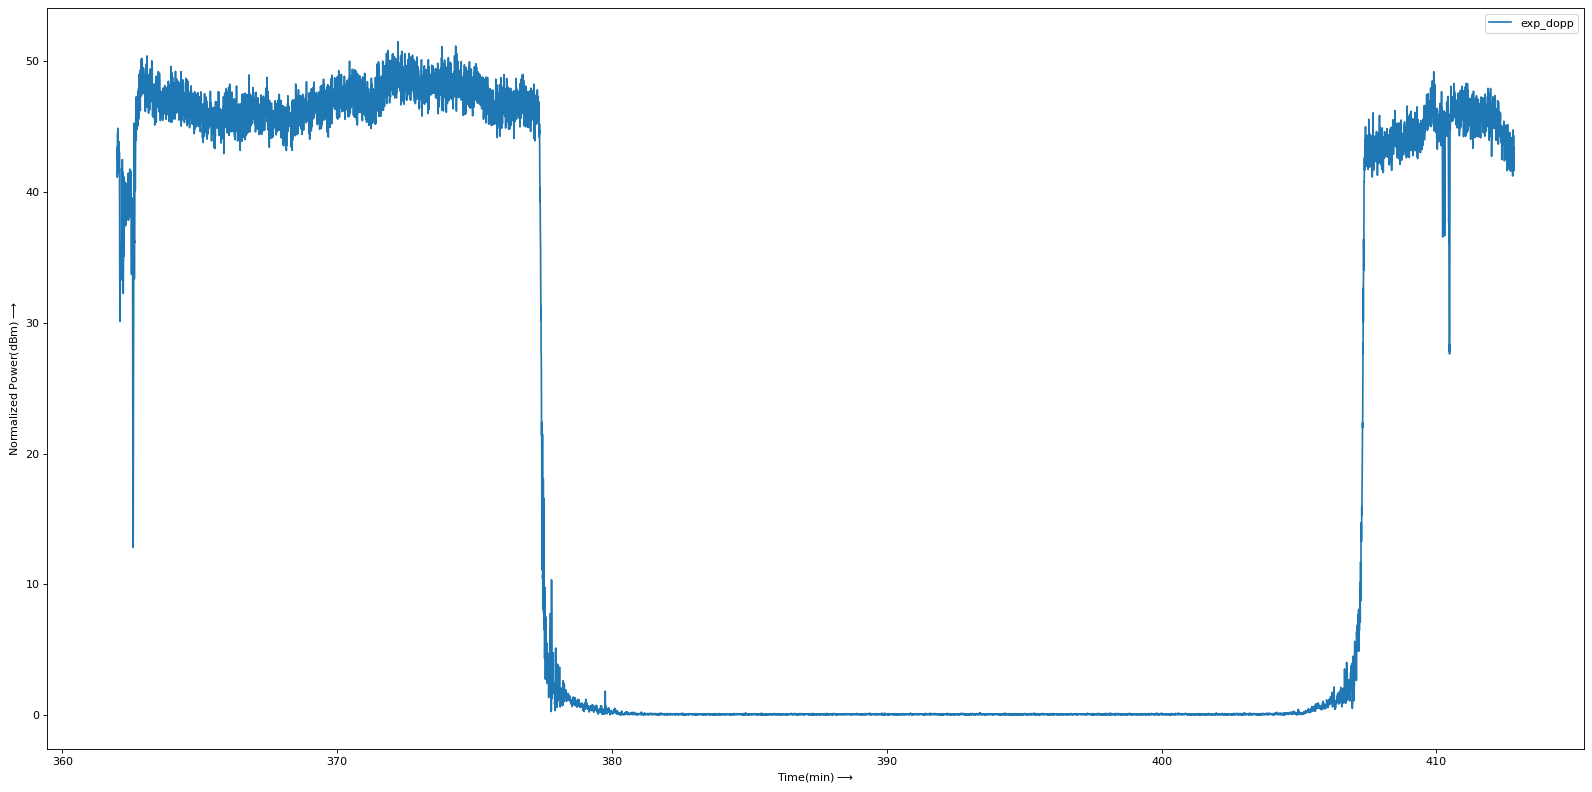

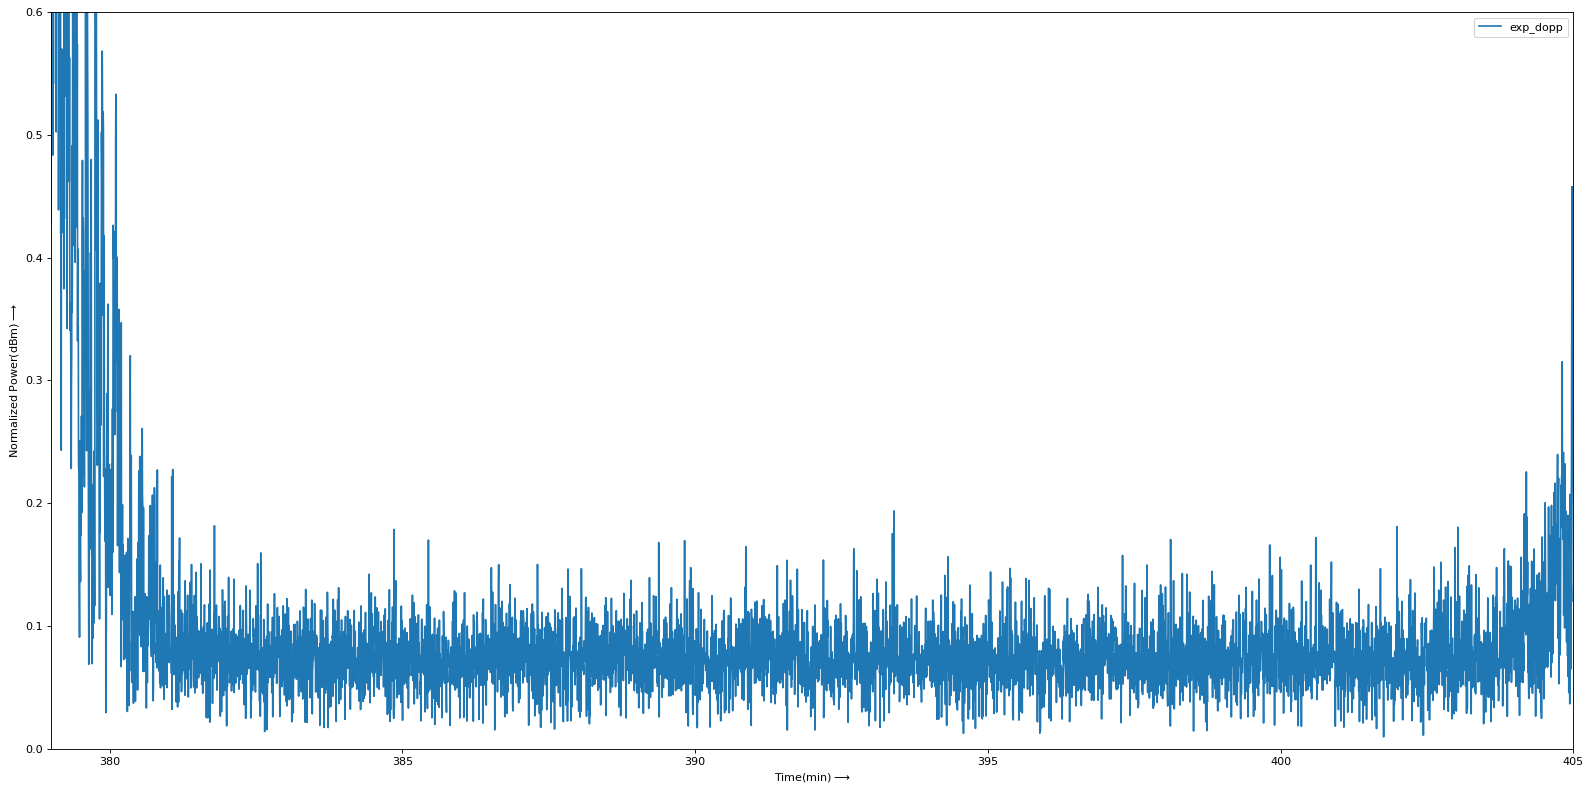

In [2]:
fig = plt.figure(figsize = (20,10) , dpi= 80)
plt.plot(timesec/60, power_total,label = "exp_dopp")
plt.xlabel("Time(min)$\longrightarrow$")
plt.ylabel("Normalized Power(dBm)$\longrightarrow$")
# plt.title("test_plot")
plt.legend(loc = 'best')
plt.tight_layout()
# fig.savefig('trial.png')
plt.show()
#-----------------------------------------------------------------------------------------------------------------

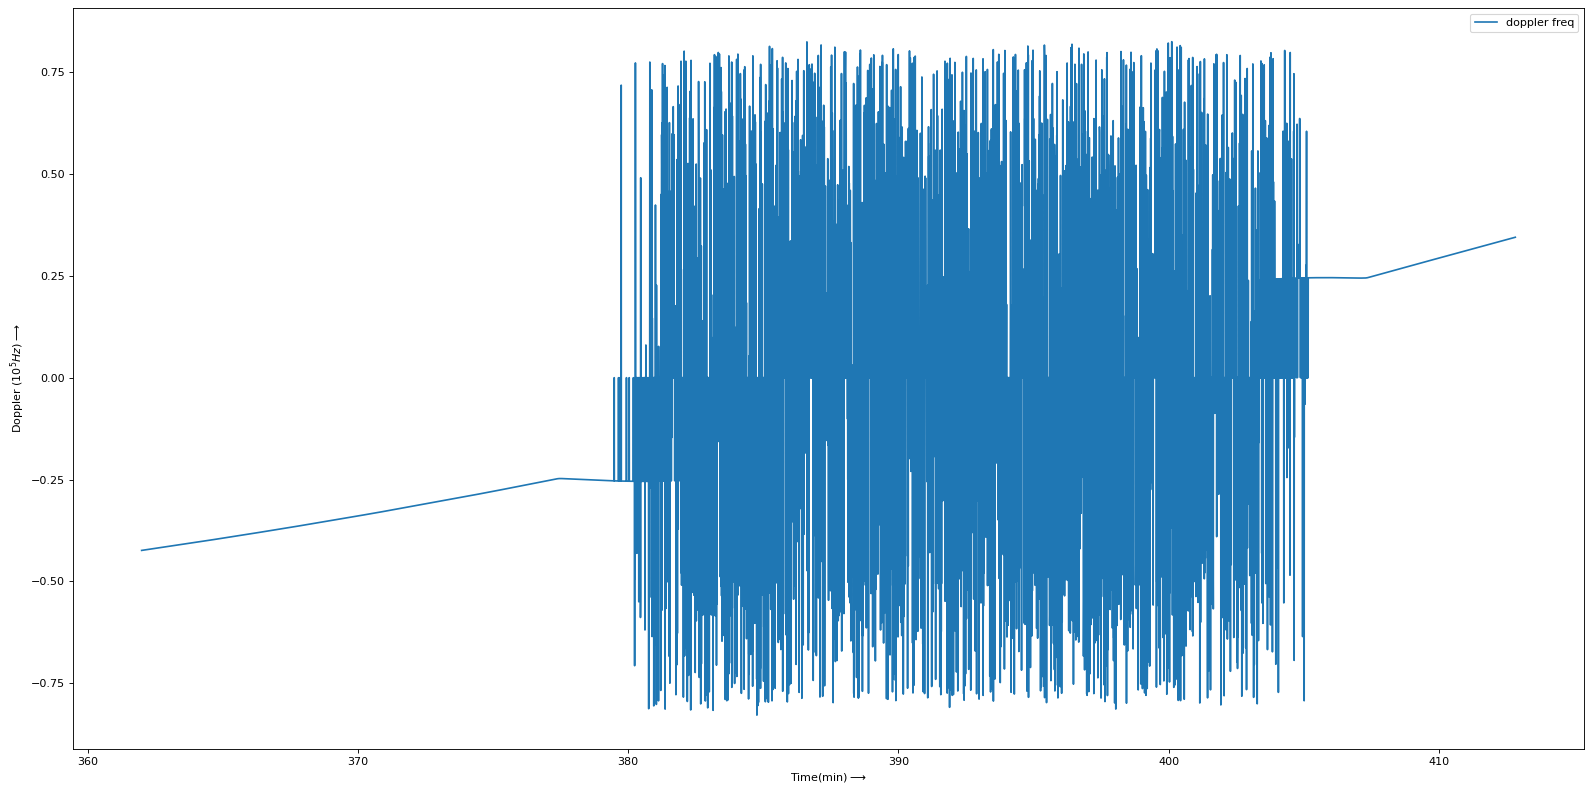

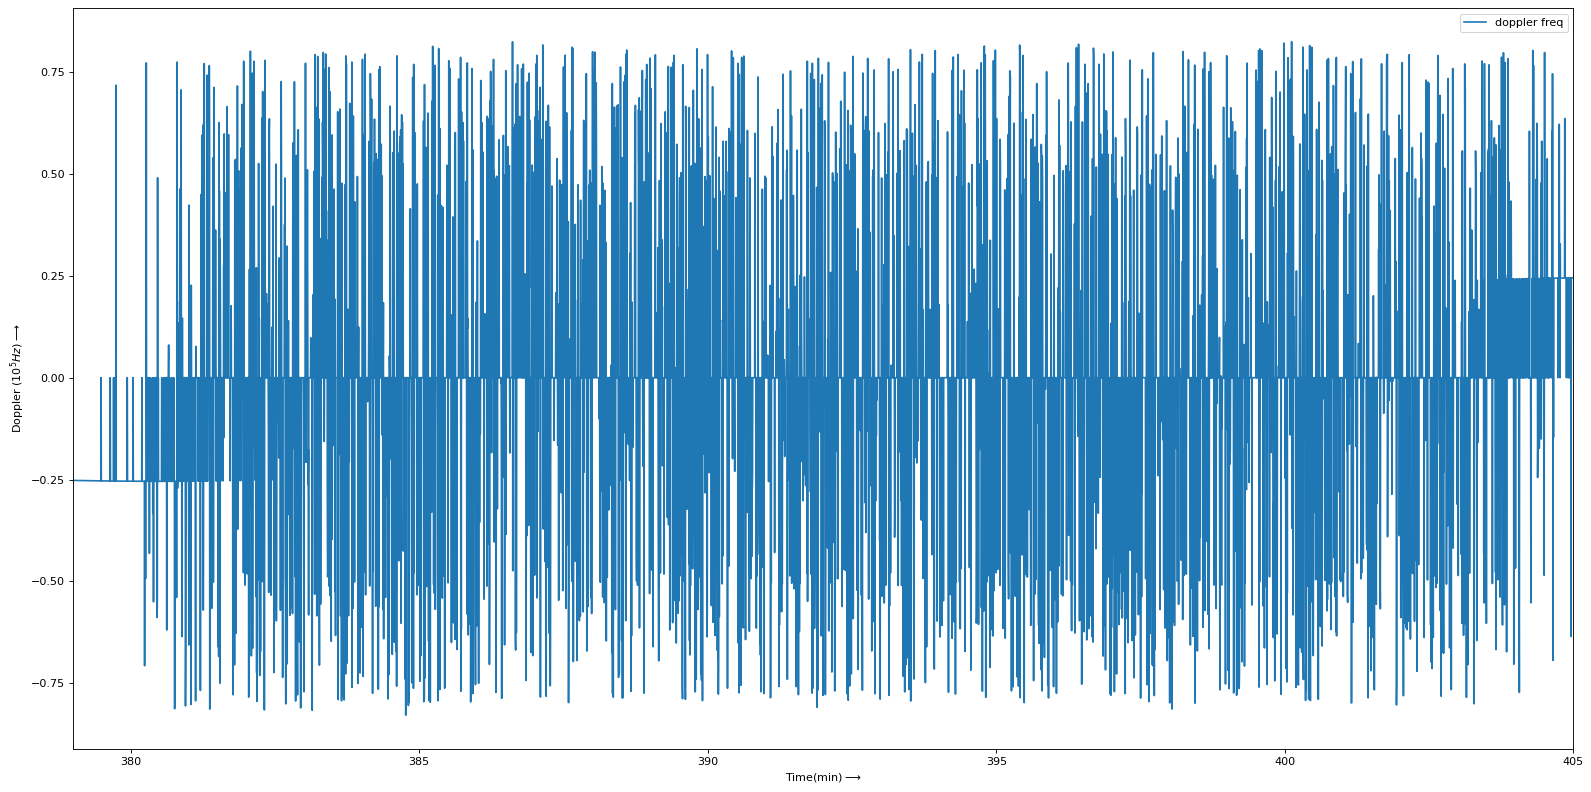

In [3]:
fig = plt.figure(figsize = (20,10) , dpi= 80)
# plt.plot(timesec/60, exp_dopp/(10**6),label = "exp_dopp")
plt.plot(timesec/60,dopp_firstmoment/(10**5),label ="doppler freq")
plt.xlabel("Time(min)$\longrightarrow$")
plt.ylabel("Doppler $ (10^5 Hz) \longrightarrow$")
# plt.title("test_plot")
plt.legend(loc = 'best')
plt.tight_layout()
# fig.savefig('trial.png')
plt.show()